In [1]:
from data_clean import *
from error_detect import *

#  写入你的数据库路径

In [41]:
file_path = r"D:\Jilin_university\Harbin_bridge_pro\原始数据-按月\原始数据-按月\2022-09.csv" #导入数据库路径

In [42]:
dl = ds_load(file_path) #加载数据库

# 按时间顺序排序

In [43]:
dl.sort_by_time_order()

# 将索力数据存入字典当中(运行时间较长)

In [47]:
# dl.df2dict_SLData_Date(0)
dl.df2dict_SLData_Date(1)

# 根据字典查询数据及日期 dict:{"SLS01":[1, 2, 3 , 4 , 5], "SLS02":[1, 4 ,5 ,6, 7, 8], ...}

In [6]:
dl.SLData_dict

{'SLS01': [5941.407,
  5941.364,
  5941.956,
  5944.005,
  5949.881,
  5956.845,
  5960.262,
  5962.942,
  5965.825,
  5964.024,
  5957.886,
  5948.952,
  5942.384,
  5943.007,
  5965.024,
  5945.515,
  5953.409,
  5955.242,
  5953.181,
  5951.939,
  5948.993,
  5943.852,
  5937.748,
  5929.717,
  5915.605,
  5915.818,
  5916.702,
  5921.378,
  5928.305,
  5940.927,
  5943.036,
  5948.585,
  5951.165,
  5949.983,
  5938.082,
  5936.752,
  5938.555,
  5940.982,
  5944.628,
  5955.846,
  5965.831,
  5966.695,
  5972.959,
  5974.34,
  5970.19,
  5966.2,
  5949.785,
  5941.735,
  5952.546,
  5956.262,
  5953.134,
  5957.834,
  5958.308,
  5956.869,
  5954.622,
  5952.105,
  5946.22,
  5939.613,
  5933.444,
  5931.791,
  5926.787,
  5931.316,
  5945.391,
  5946.742,
  5940.535,
  5940.529,
  5938.47,
  17061.071,
  5932.889,
  5921.643,
  5916.705,
  5916.993,
  5921.032,
  5910.466,
  5908.216,
  5911.617,
  5913.163,
  5925.163,
  5928.802,
  5928.773,
  5933.023,
  5933.156,
  17061.071,

In [7]:
dl.SLMdata_dict

{'SLS01': [Timestamp('2022-07-01 11:35:46'),
  Timestamp('2022-07-01 13:35:41'),
  Timestamp('2022-07-01 15:35:41'),
  Timestamp('2022-07-01 17:35:44'),
  Timestamp('2022-07-01 19:35:40'),
  Timestamp('2022-07-01 21:35:39'),
  Timestamp('2022-07-01 23:35:40'),
  Timestamp('2022-07-02 01:35:43'),
  Timestamp('2022-07-02 03:35:44'),
  Timestamp('2022-07-02 05:35:42'),
  Timestamp('2022-07-02 07:35:46'),
  Timestamp('2022-07-02 09:35:48'),
  Timestamp('2022-07-02 11:35:42'),
  Timestamp('2022-07-02 13:35:44'),
  Timestamp('2022-07-02 15:35:42'),
  Timestamp('2022-07-02 17:36:56'),
  Timestamp('2022-07-02 19:35:40'),
  Timestamp('2022-07-02 21:35:44'),
  Timestamp('2022-07-02 23:35:43'),
  Timestamp('2022-07-03 01:38:08'),
  Timestamp('2022-07-03 03:36:56'),
  Timestamp('2022-07-03 05:35:41'),
  Timestamp('2022-07-03 07:36:54'),
  Timestamp('2022-07-03 09:35:41'),
  Timestamp('2022-07-03 11:35:43'),
  Timestamp('2022-07-03 13:36:59'),
  Timestamp('2022-07-03 15:38:15'),
  Timestamp('2022-0

# Example(利用箱线法检测异常值)

In [12]:
SLdata_list = dl.SLData_dict["SLS03"]

[203, 237]


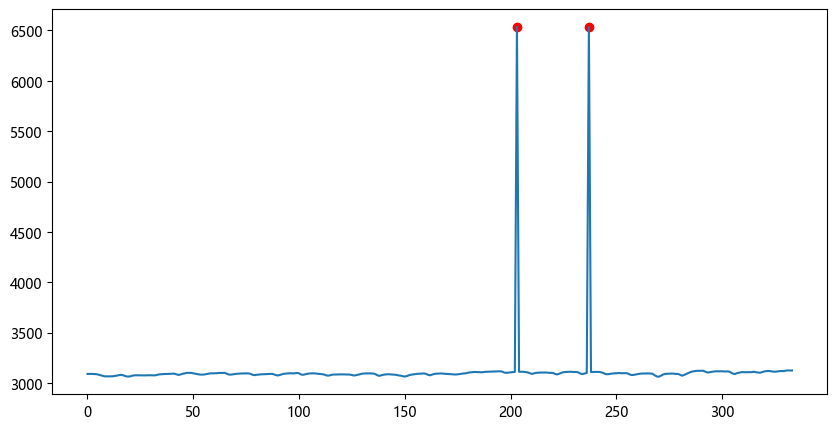

In [13]:
bp = box_plot()
error_index_list1 = bp.box_plot_train(SLdata_list)
print(error_index_list1)
plt.rcParams["figure.figsize"] = (10, 5)
dl.detect_error_pic(SLdata_list, error_index_list1)

# 下面以2020年1月份中方24个传感器为例

# 异常点检测图

In [ ]:
@return_index
def Dbscan_train(SLdata_list):
    db = DBSCAN(eps = 0.67, min_samples=25).fit(np.array(SLdata_list).reshape(-1, 1))
    return db.labels_

def Z_score(SLdata_list):
    new_list = []
    if np.std(SLdata_list) != 0:
        for data in SLdata_list:
            new_list.append((data - np.mean(SLdata_list)) / np.std(SLdata_list))
    else: new_list = eval("[" + ",".join("0" * len(SLdata_list)) + "]")
    return new_list

file_path =  r"D:\Jilin_university\Harbin_bridge_pro\原始数据-按月\原始数据-按月"
for i in range(1, 10):
    file_path += "\\" + "2022-0" + str(i) + ".csv"
    dl = ds_load(file_path)
    dl.sort_by_time_order()
    for i in range(2):
        dl.df2dict_SLData_Date(i)
        prefix = "SLS" if i == 0 else "SLX"
        for i in range(1, 25, 1):
            sensor_id = prefix + "0" + str(i) if i < 10 else prefix + str(i)
            SLdata_list = dl.SLData_dict[sensor_id]
            SLMdate_list = dl.SLMdata_dict[sensor_id]
            new_SLdata_list = Z_score(SLdata_list)
            error_index_list = Dbscan_train(new_SLdata_list)
            fg = plt.figure(figsize = (40, 50))
            ax = fg.add_subplot(24,2,i)
            ax.plot(dl.SLMdata_dict[sensor_id], SLdata_list)
            ax.set_xlabel("Date")
            ax.set_ylabel("SLDate")
            ax.set_title(sensor_id)

In [46]:
ts = three_sigma()
iosfor = iostation_forest()
km = k_means()
s = svm_()
# f = open(r"C:\Users\yanzeyi\Desktop\9.txt", "w+")
fg = plt.figure(figsize = (40, 50))
for i in range(1, 25, 1):
    sensor_id = "SLX" + "0" + str(i) if i < 10 else "SLX" + str(i)
    
    SLdata_list = dl.SLData_dict[sensor_id]
    SLMdate_list = dl.SLMdata_dict[sensor_id]
    
    @return_index
    def Dbscan_train(SLdata_list):
        db = DBSCAN(eps = 0.67, min_samples=25).fit(np.array(SLdata_list).reshape(-1, 1))
        return db.labels_

    def Z_score(SLdata_list):
        new_list = []
        if np.std(SLdata_list) != 0:
            for data in SLdata_list:
                new_list.append((data - np.mean(SLdata_list)) / np.std(SLdata_list))
        else: new_list = eval("[" + ",".join("0" * len(SLdata_list)) + "]")
        return new_list
    new_SLdata_list = Z_score(SLdata_list)
    error_index_list = Dbscan_train(new_SLdata_list)
    
#     error_index_list = km.k_means_train(2, dl.SLData_dict[sensor_id])
#     error_index_list = ts.three_sigma_(dl.SLData_dict[sensor_id])
#     plot_index = int(str(122) + str(i))
    ax = fg.add_subplot(12,2,i)
    ax.plot(dl.SLMdata_dict[sensor_id], SLdata_list)
    ax.set_xlabel("Date")
    ax.set_ylabel("SLDate")
    ax.set_title(sensor_id)
#     f.write(sensor_id + ":" +"\n")
    for error_index in error_index_list:
        ax.scatter(SLMdate_list[error_index], SLdata_list[error_index], c = "r")
#         f.write( "  " + str(SLdata_list[error_index]) + "  " +  str(SLMdate_list[error_index]) + "\n")
fg.tight_layout()
fg.savefig('1_SLX.jpg')
# f.close()
# ax1.rcParams["figure.figsize"] = (20, 10)

KeyError: 'SLX01'

<Figure size 4000x5000 with 0 Axes>

# 填补图

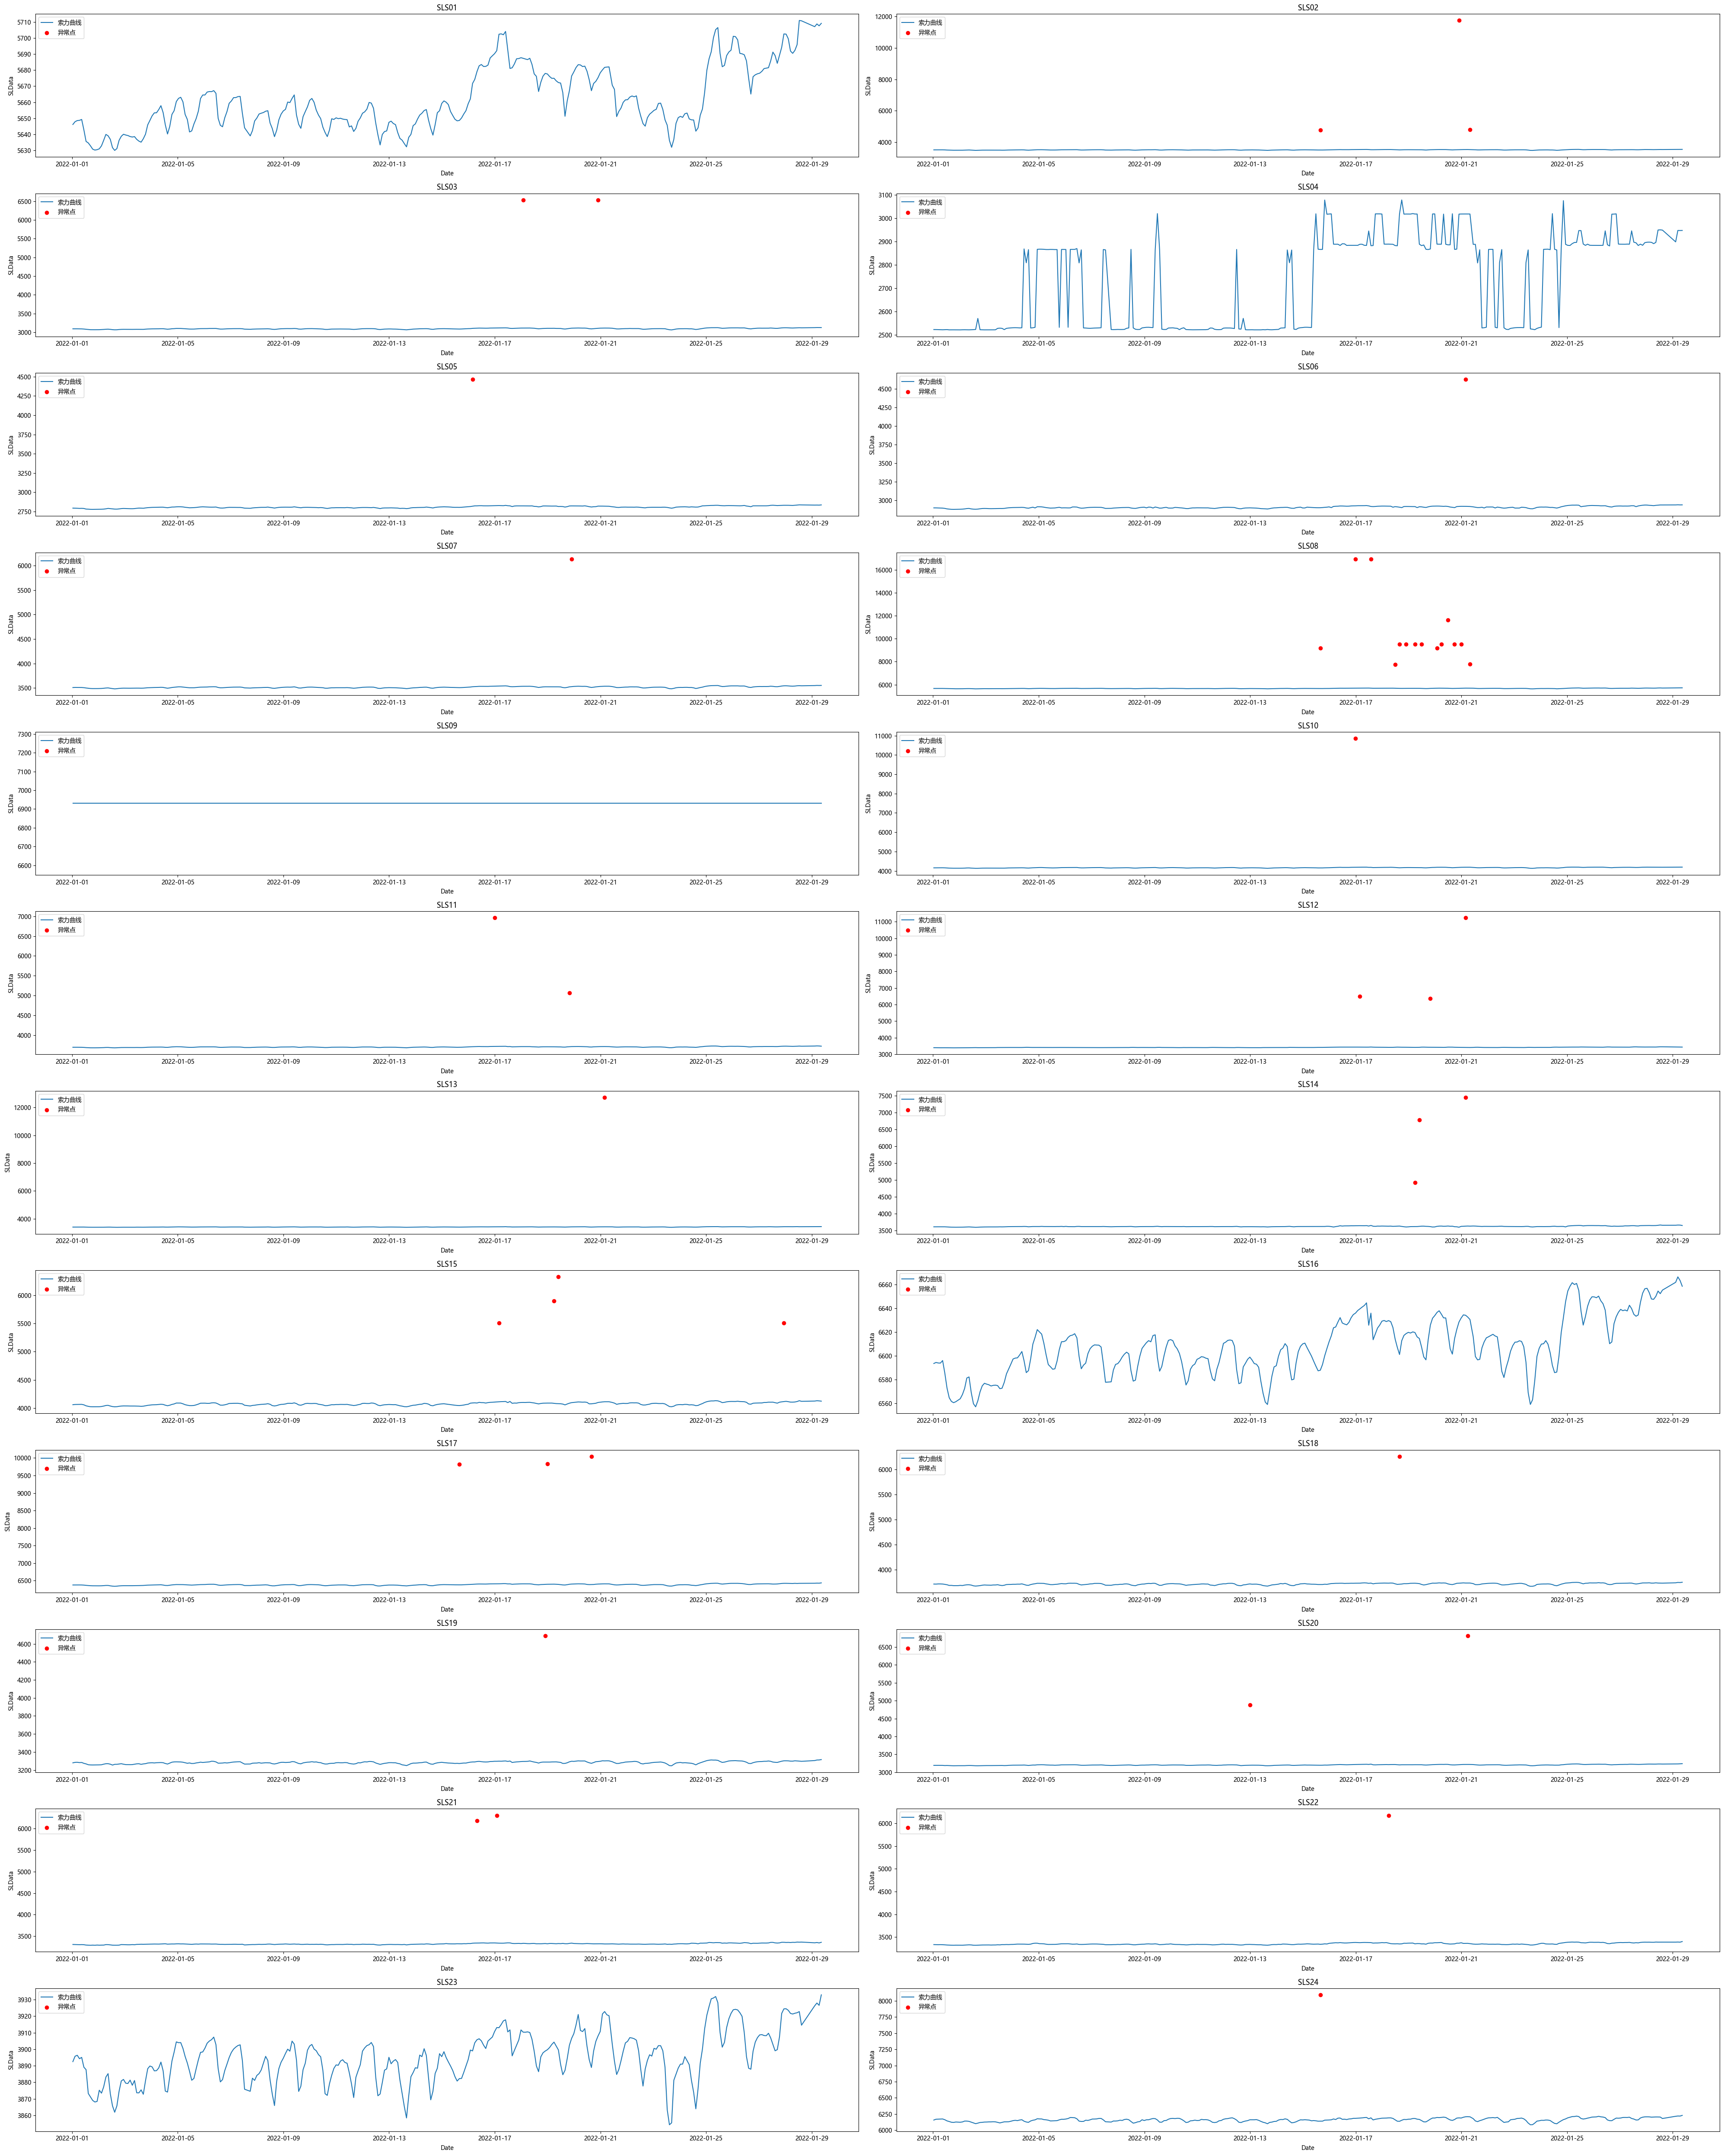

In [9]:
from matplotlib.font_manager import FontProperties #字体管理器
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

fg = plt.figure(figsize = (40, 50))
for i in range(1, 25, 1):
    sensor_id = "SLS" + "0" + str(i) if i < 10 else "SLS" + str(i)
    
    SLData_list = dl.SLData_dict[sensor_id]
    SLMdate_list = dl.SLMdata_dict[sensor_id]

    error_index_list = ts.three_sigma_(SLData_list)
    new_SLDate_list = fill_point(SLData_list, error_index_list)
#     plot_index = int(str(122) + str(i))
    ax = fg.add_subplot(12,2,i)
    ax.plot(SLMdate_list, new_SLDate_list, label = "索力曲线")
    ax.set_xlabel("Date")
    ax.set_ylabel("SLData")
    ax.set_title(sensor_id)
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    error_data_date = []
    error_data = []
    for error_index in error_index_list:
        error_data_date.append(SLMdate_list[error_index])
        error_data.append(SLData_list[error_index])
    ax.scatter(error_data_date, error_data, c = "r", label = "异常点")
    ax.legend(loc='upper left')
fg.tight_layout()